### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#FF4500;">Project 3 - Advanced Statistics - 2. Education - Post 12th Standard Analysis     
    

<span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#4682B4;">by - Madhu Narayanan  



#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#2E8B57;">Problem 2.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea;">Problem Statement: 
    
<font color=bloodred>The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric:

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea;">Rubric - Problem 2: 

2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.    
    
2.2) Scale the variables and write the inference for using the type of scaling function for this case study.    
2.3) Comment on the comparison between covariance and the correlation matrix.   
    
2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.   
    
2.5) Build the covariance matrix, eigenvalues, and eigenvector.   
    
2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).   
    
2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?    
Perform PCA and export the data of the Principal Component scores into a data frame.   
    
2.8) Mention the business implication of using the Principal Component Analysis for this case study. 

###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea;">Import important Libraries required and load the dataset Education - Post 12th Standard.csv

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
edu = pd.read_csv('Education - Post 12th Standard.csv')

In [57]:
edu.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [58]:
edu.shape

(777, 18)

In [59]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

<font color=royalblue>There are 777 records and 18 attributes(dimensions) in the dataset with datatypes float64(1), int64(16), object(1)

<font color=blue>Check for missing/Null values in the dataset

In [60]:
edu.isnull().values.any()

False

In [61]:
edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

<font color=royalblue>There are no missing or null values in the dataset.

<font color=blue>Check for duplicate records

In [62]:
duplicates = edu.duplicated()
print('Number of duplicate rows in the dataset is:-', duplicates.sum())

edu[duplicates]

Number of duplicate rows in the dataset is:- 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


<font color=royalblue>There are no duplicate records in the dataset.

In [63]:
edu.columns.unique()

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [64]:
edu['Names'].nunique()

777

<font color=royalblue>Data Cleaning not required for this dataset as there are no Null vales and duplicate records. However, column 'Names' has got all 777 records unique data. This will not help in any analysis as the unique variable can be remved from the dataframe. Suggest not the disturb the original data, therefore for further analysis, let's create a copyt df. The dataset is good to go for EDA.

In [65]:
df = edu.copy()

In [66]:
# drop column 'Names'
df.drop(['Names'],axis=1,inplace=True)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.   

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Univariate Analysis

(array([[656.,  85.,  29.,   6.,   0.,   0.,   0.,   0.,   1.,   0.],
        [722.,  46.,   7.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
        [772.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [777.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [777.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [629.,  82.,  45.,  10.,   8.,   3.,   0.,   0.,   0.,   0.],
        [766.,  10.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 82., 408., 214.,  73.,   0.,   0.,   0.,   0.,   0.,   0.],
        [662., 115.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [777.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [776.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [777.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [777.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [777.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [777.,   0.,

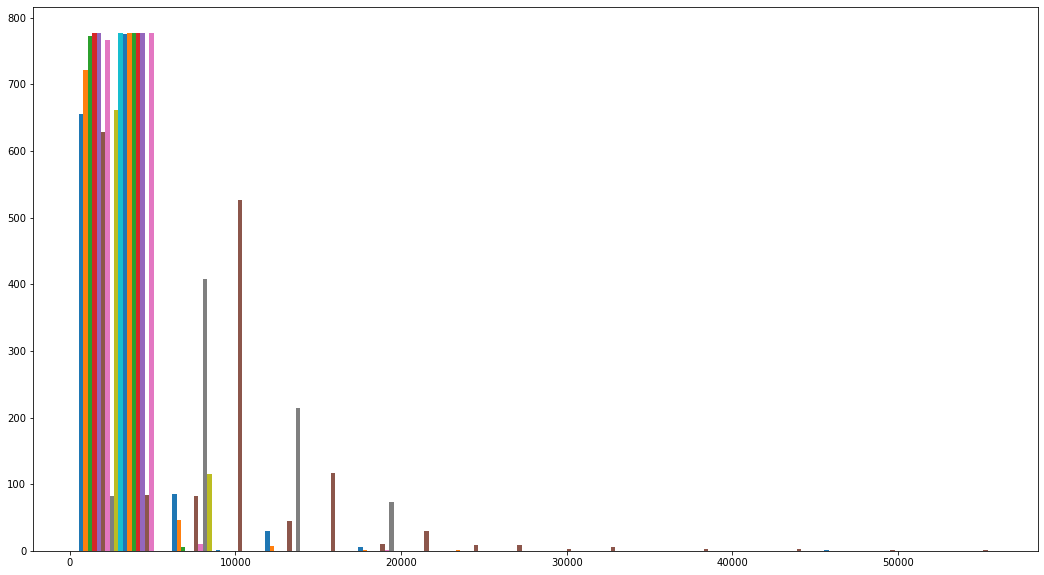

In [67]:
plt.figure(figsize=(18,10))
plt.hist(df)

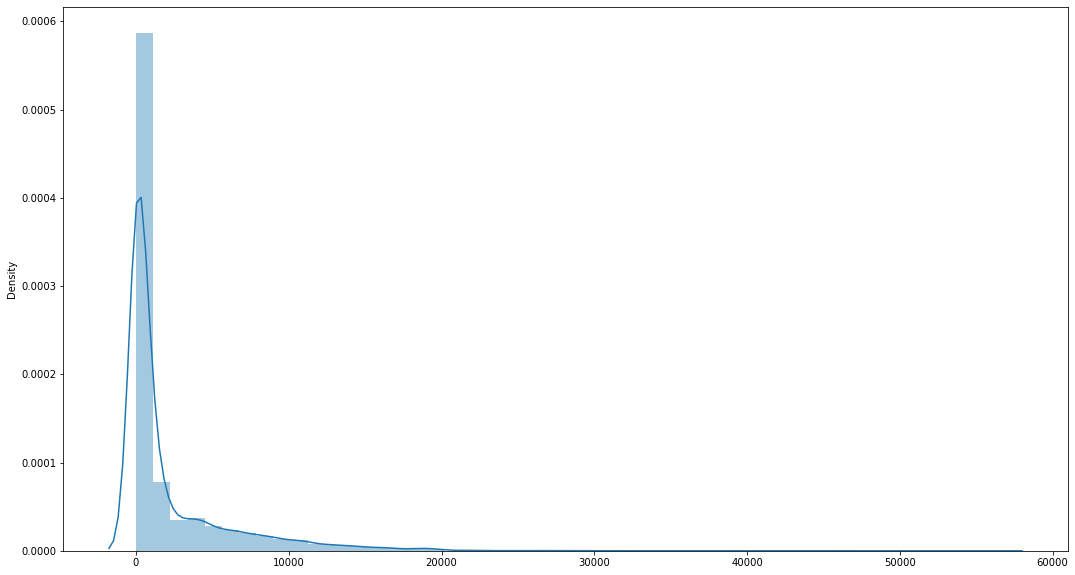

In [68]:
plt.figure(figsize=(18,10))
sns.distplot(df);

<font color=green>Outlier correction done before we proceed with further analysis by replacing the upper limit value and lower limit value for 1.5Q3 and 1.5Q1 respectively.

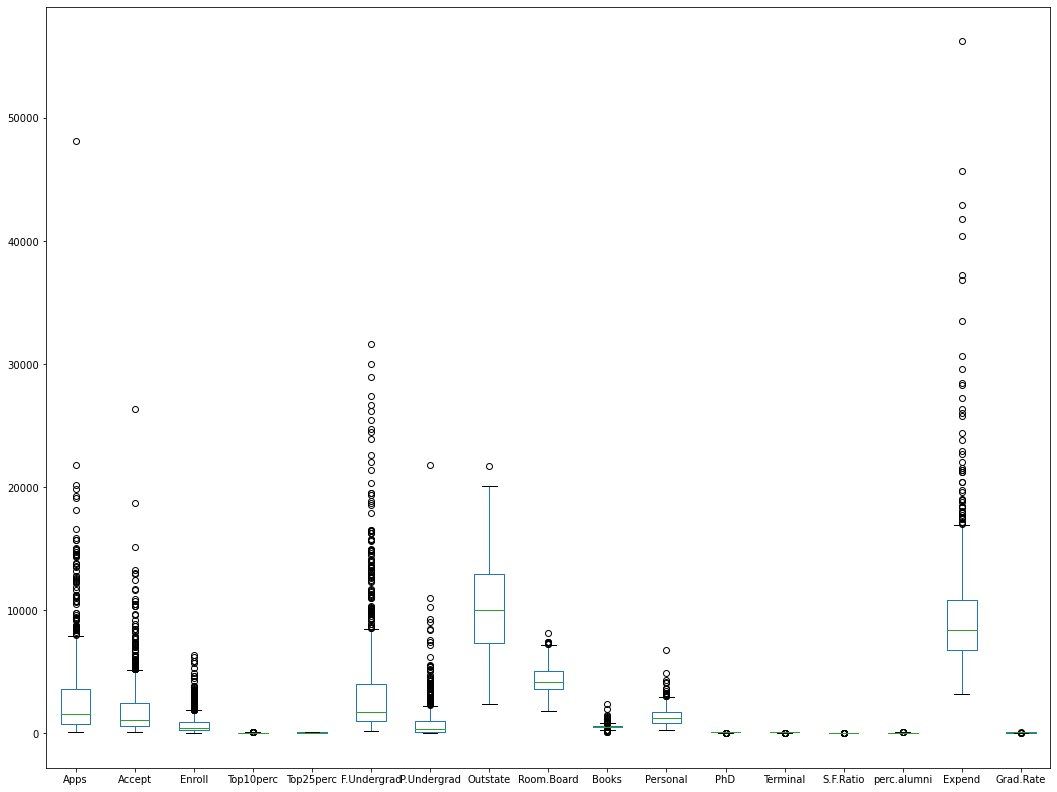

In [69]:
df.plot(kind='box', figsize=(18,14));

<font color=royalblue>From the above boxplot to check outliers, we can see almost all variables have got outliers. Let's replace the outliers to the upper & lower limit of IQR values so that further analysis can be done.

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64


In [71]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
df_out.shape

(539, 17)

In [72]:
df2 = df.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df2 < Q1 - 1.5 * IQR)[0], np.where(df2 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df2.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df2 > Q3 + 1.5 * IQR)[0], np.where(df2 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df2.iloc[i,j] = whisker[j]
    

In [73]:
df2.shape, df.shape

((777, 17), (777, 17))

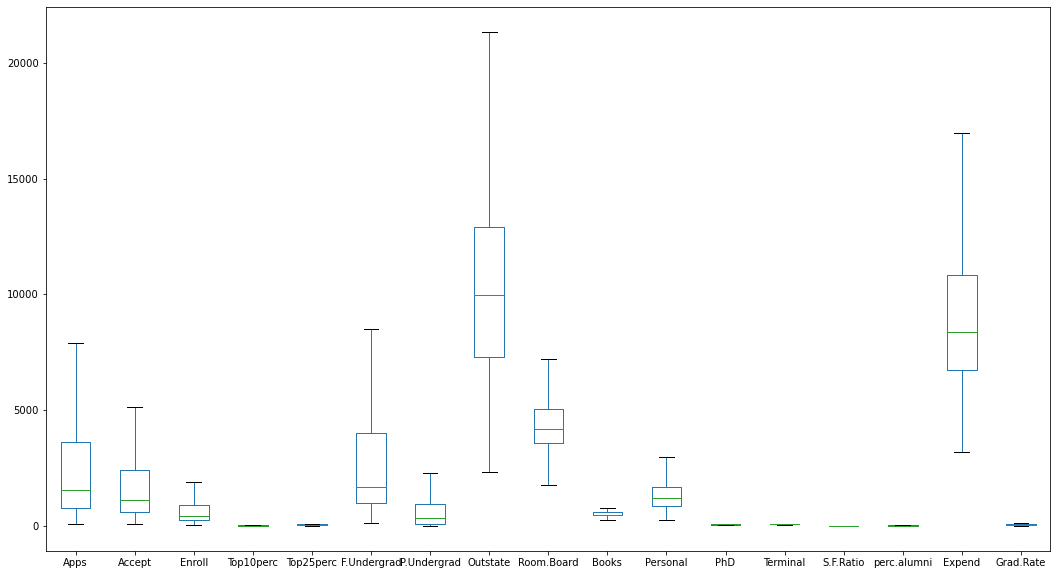

In [74]:
# checking the same with plotting boxplot to confirm outlier treatment

df2.plot(kind='box', figsize=(18,10));

In [75]:
Skewness = pd.DataFrame({'Skewness':[stats.skew(df2.Apps),stats.skew(df2.Accept),stats.skew(df2.Enroll),stats.skew(df2['Top10perc']),stats.skew(df2['Top25perc']),stats.skew(df2['F.Undergrad']),stats.skew(df2['P.Undergrad']),stats.skew(df2.Outstate),stats.skew(df2['Room.Board']),stats.skew(df2['Books']),stats.skew(df2['Personal']),stats.skew(df2.PhD),stats.skew(df2.Terminal),stats.skew(df2['S.F.Ratio']),stats.skew(df2['perc.alumni']), stats.skew(df2['Expend']),stats.skew(df2['Grad.Rate'])]},
                        index=['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books','Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate'])
Skewness

,Skewness
Apps,1.164081
Accept,1.148975
Enroll,1.152787
Top10perc,0.878688
Top25perc,0.258839
F.Undergrad,1.146830
P.Undergrad,1.163951
Outstate,0.506461
Room.Board,0.441675
Books,0.239253


<AxesSubplot:ylabel='Frequency'>

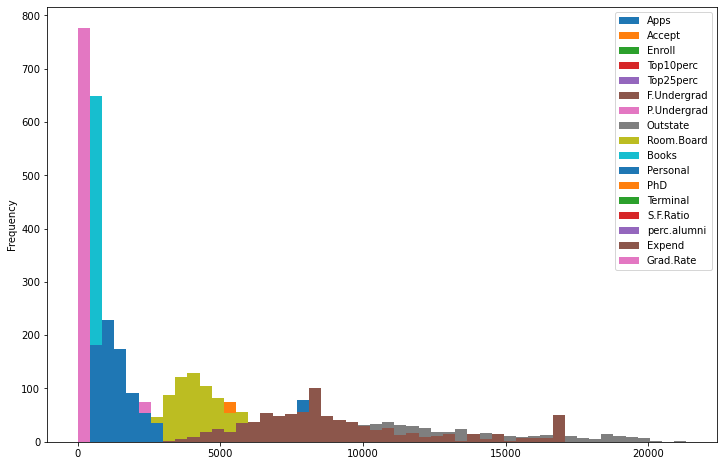

In [76]:
df2.plot(kind='hist',bins=50,figsize=(12,8))

<AxesSubplot:ylabel='Density'>

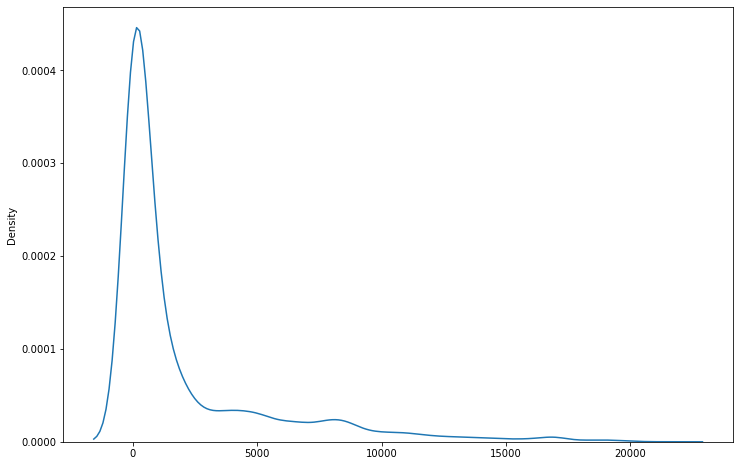

In [77]:
plt.figure(figsize=(12,8))
sns.distplot(df2, hist=False)

<AxesSubplot:ylabel='Density'>

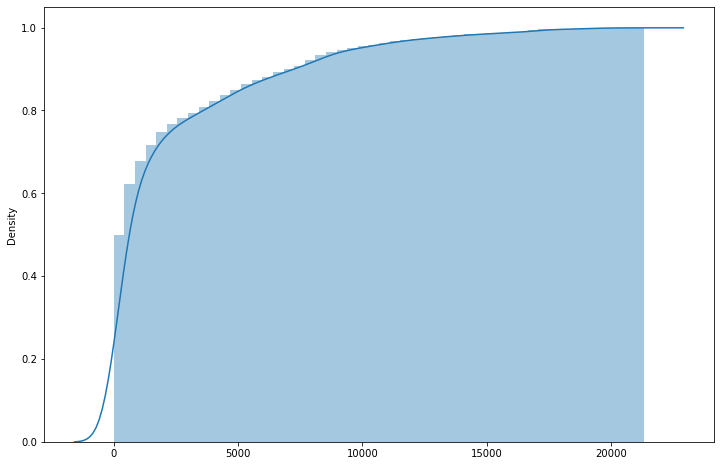

In [78]:
plt.figure(figsize=(12,8))
sns.distplot(df2, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

Text(0.5, 1.0, 'F.Undergrad')

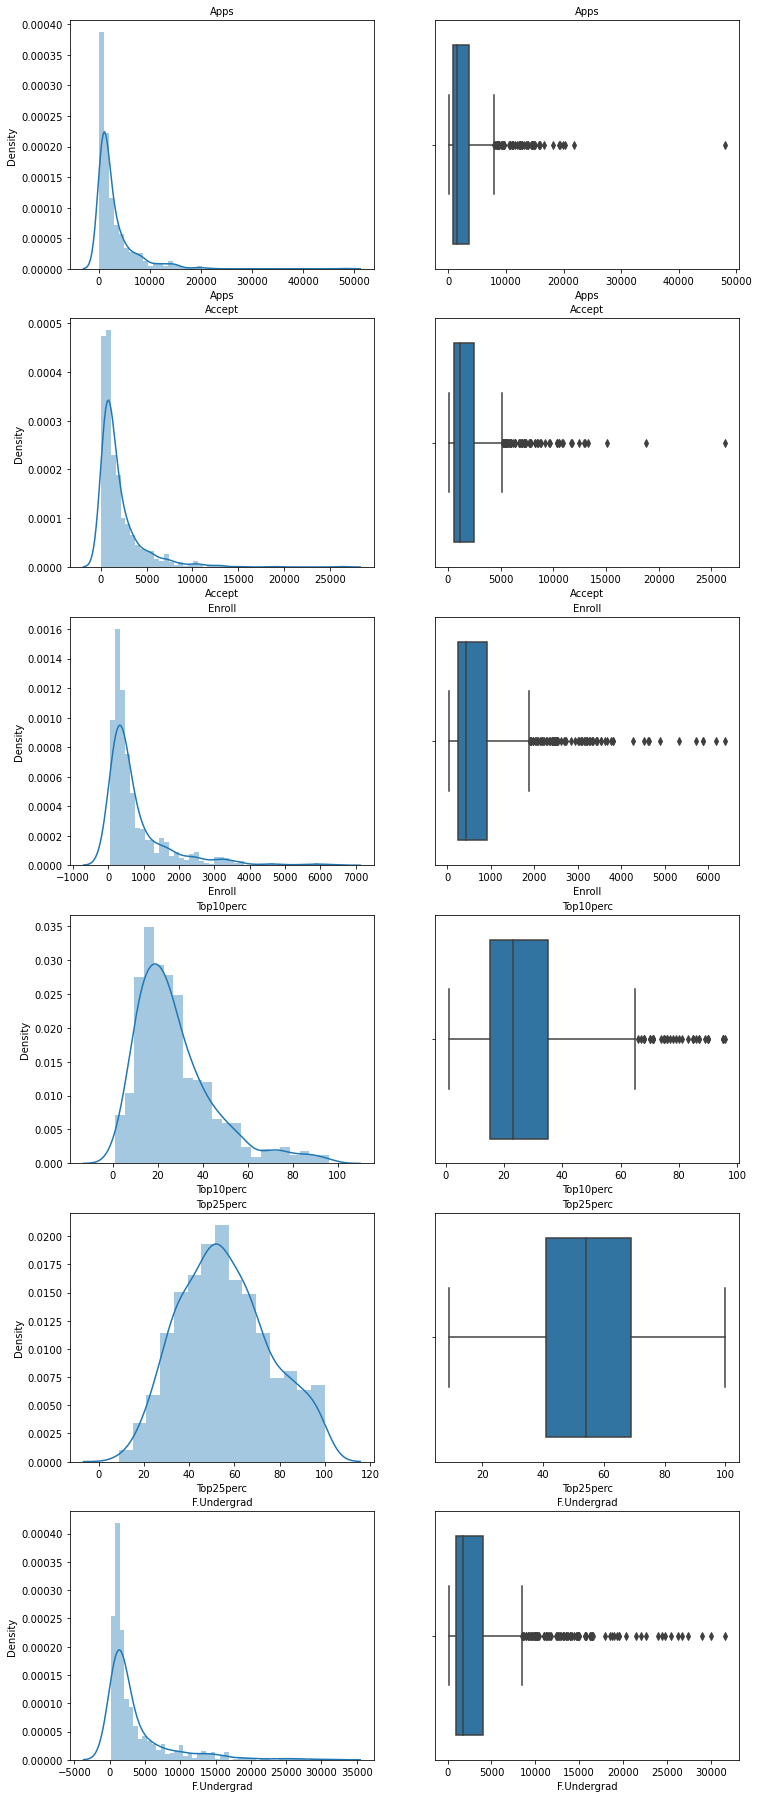

In [79]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12,32)

a = sns.distplot(df['Apps'] , ax=axes[0][0])
a.set_title("Apps",fontsize=10)
a = sns.boxplot(df['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps",fontsize=10)


a = sns.distplot(df['Accept'] , ax=axes[1][0])
a.set_title("Accept",fontsize=10)
a = sns.boxplot(df['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept",fontsize=10)


a = sns.distplot(df['Enroll'] , ax=axes[2][0])
a.set_title("Enroll",fontsize=10)
a = sns.boxplot(df['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll",fontsize=10)



a = sns.distplot(df['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc",fontsize=10)
a = sns.boxplot(df['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc",fontsize=10)


a = sns.distplot(df['Top25perc'] , ax=axes[4][0])
a.set_title("Top25perc",fontsize=10)
a = sns.boxplot(df['Top25perc'] , orient = "v" , ax=axes[4][1])
a.set_title("Top25perc",fontsize=10)


a = sns.distplot(df['F.Undergrad'] , ax=axes[5][0])
a.set_title("F.Undergrad",fontsize=10)
a = sns.boxplot(df['F.Undergrad'] , orient = "v" , ax=axes[5][1])
a.set_title("F.Undergrad",fontsize=10)


Text(0.5, 1.0, 'PhD')

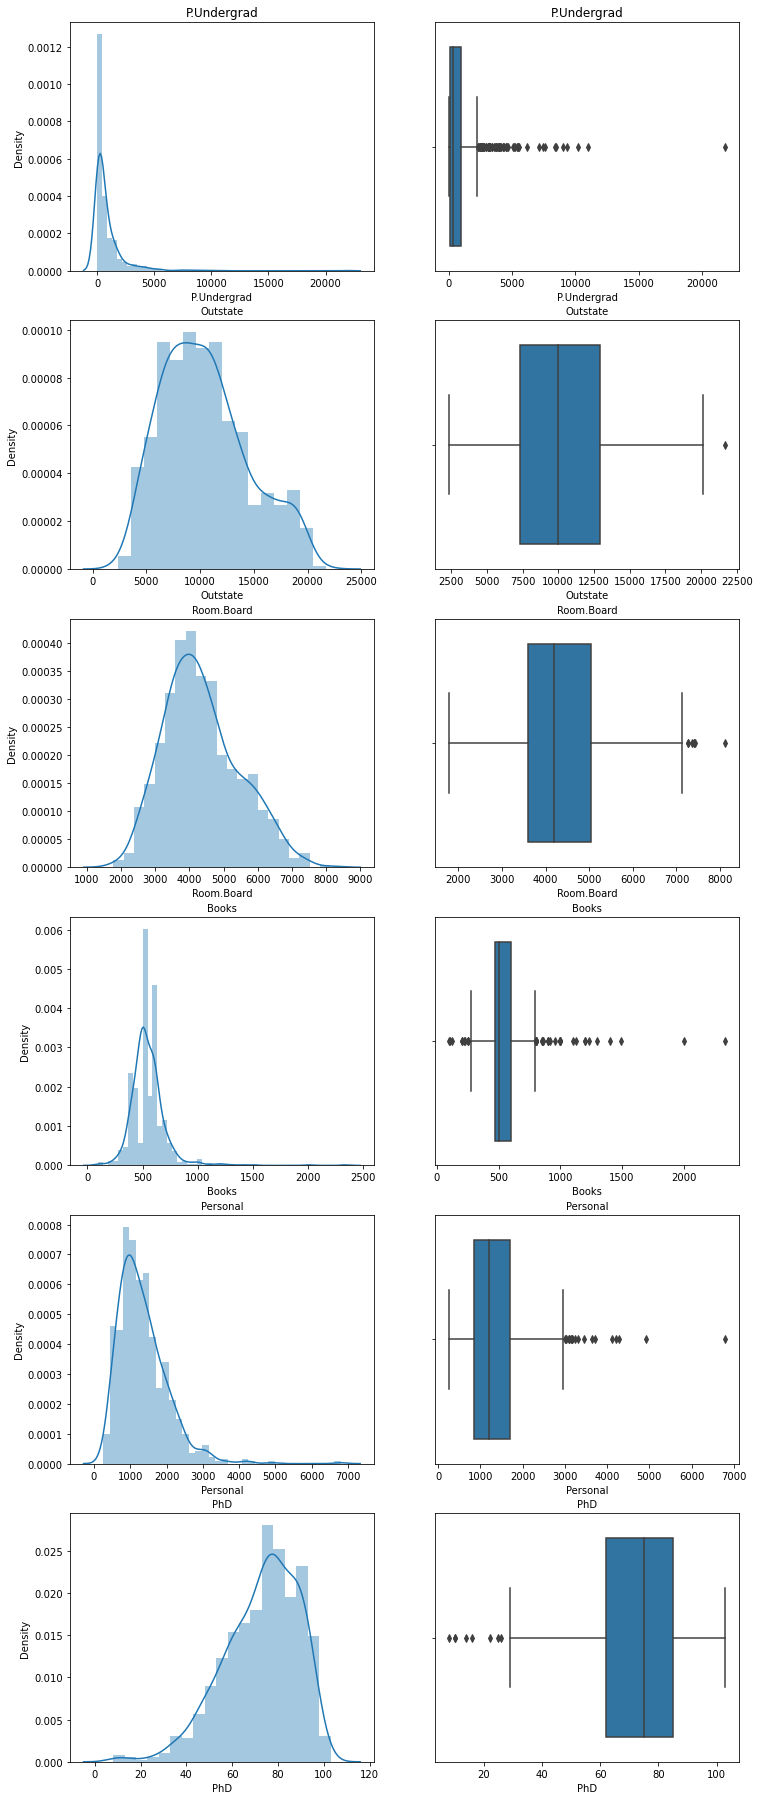

In [80]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12,32)

a = sns.distplot(df['P.Undergrad'] , ax=axes[0][0])
a.set_title("P.Undergrad",fontsize=12)
a = sns.boxplot(df['P.Undergrad'] , orient = "v" , ax=axes[0][1])
a.set_title("P.Undergrad",fontsize=12)


a = sns.distplot(df['Outstate'] , ax=axes[1][0])
a.set_title("Outstate",fontsize=10)
a = sns.boxplot(df['Outstate'] , orient = "v" , ax=axes[1][1])
a.set_title("Outstate",fontsize=10)


a = sns.distplot(df['Room.Board'] , ax=axes[2][0])
a.set_title("Room.Board",fontsize=10)
a = sns.boxplot(df['Room.Board'] , orient = "v" , ax=axes[2][1])
a.set_title("Room.Board",fontsize=10)



a = sns.distplot(df['Books'] , ax=axes[3][0])
a.set_title("Books",fontsize=10)
a = sns.boxplot(df['Books'] , orient = "v" , ax=axes[3][1])
a.set_title("Books",fontsize=10)


a = sns.distplot(df['Personal'] , ax=axes[4][0])
a.set_title("Personal",fontsize=10)
a = sns.boxplot(df['Personal'] , orient = "v" , ax=axes[4][1])
a.set_title("Personal",fontsize=10)


a = sns.distplot(df['PhD'] , ax=axes[5][0])
a.set_title("PhD",fontsize=10)
a = sns.boxplot(df['PhD'] , orient = "v" , ax=axes[5][1])
a.set_title("PhD",fontsize=10)

Text(0.5, 1.0, 'Grad.Rate')

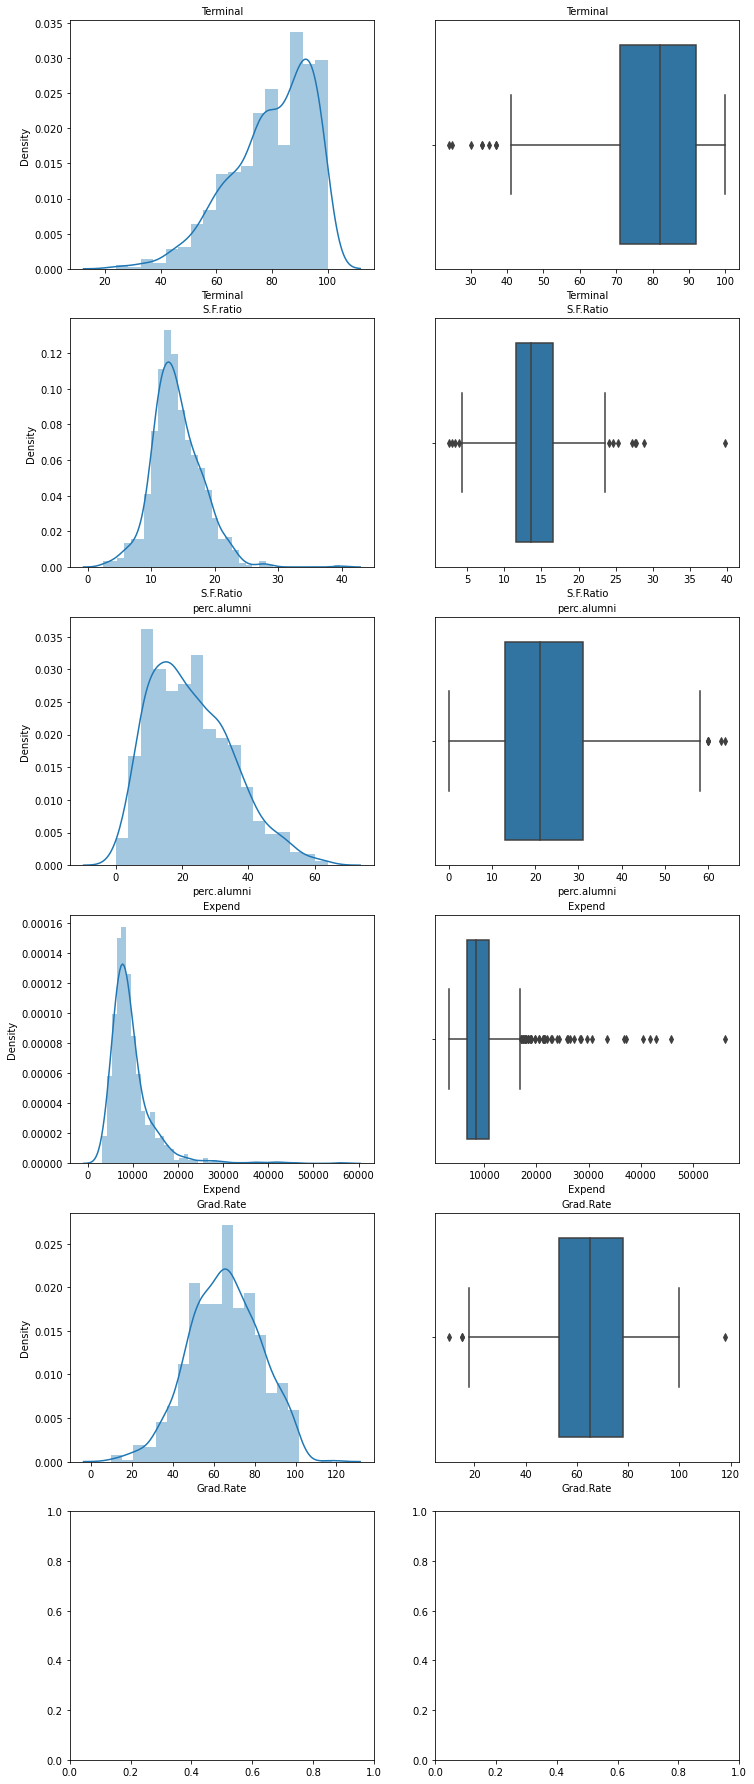

In [81]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12,32)

a = sns.distplot(df['Terminal'] , ax=axes[0][0])
a.set_title("Terminal",fontsize=10)
a = sns.boxplot(df['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal",fontsize=10)


a = sns.distplot(df['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.ratio",fontsize=10)
a = sns.boxplot(df['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio",fontsize=10)


a = sns.distplot(df['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni",fontsize=10)
a = sns.boxplot(df['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni",fontsize=10)


a = sns.distplot(df['Expend'] , ax=axes[3][0])
a.set_title("Expend",fontsize=10)
a = sns.boxplot(df['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend",fontsize=10)


a = sns.distplot(df['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate",fontsize=10)
a = sns.boxplot(df['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate",fontsize=10)

<font color=royalblue>From the above graphs, we could see that the data is skewed for most of the attributes.Also the original dataset has got outliers. We shall now understand the multicollinearity of the dataset using Multivariate Analysis like Pair plot, Pearson's Correlation & Heat map. 

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Multivariate Analysis

<Figure size 1080x1080 with 0 Axes>

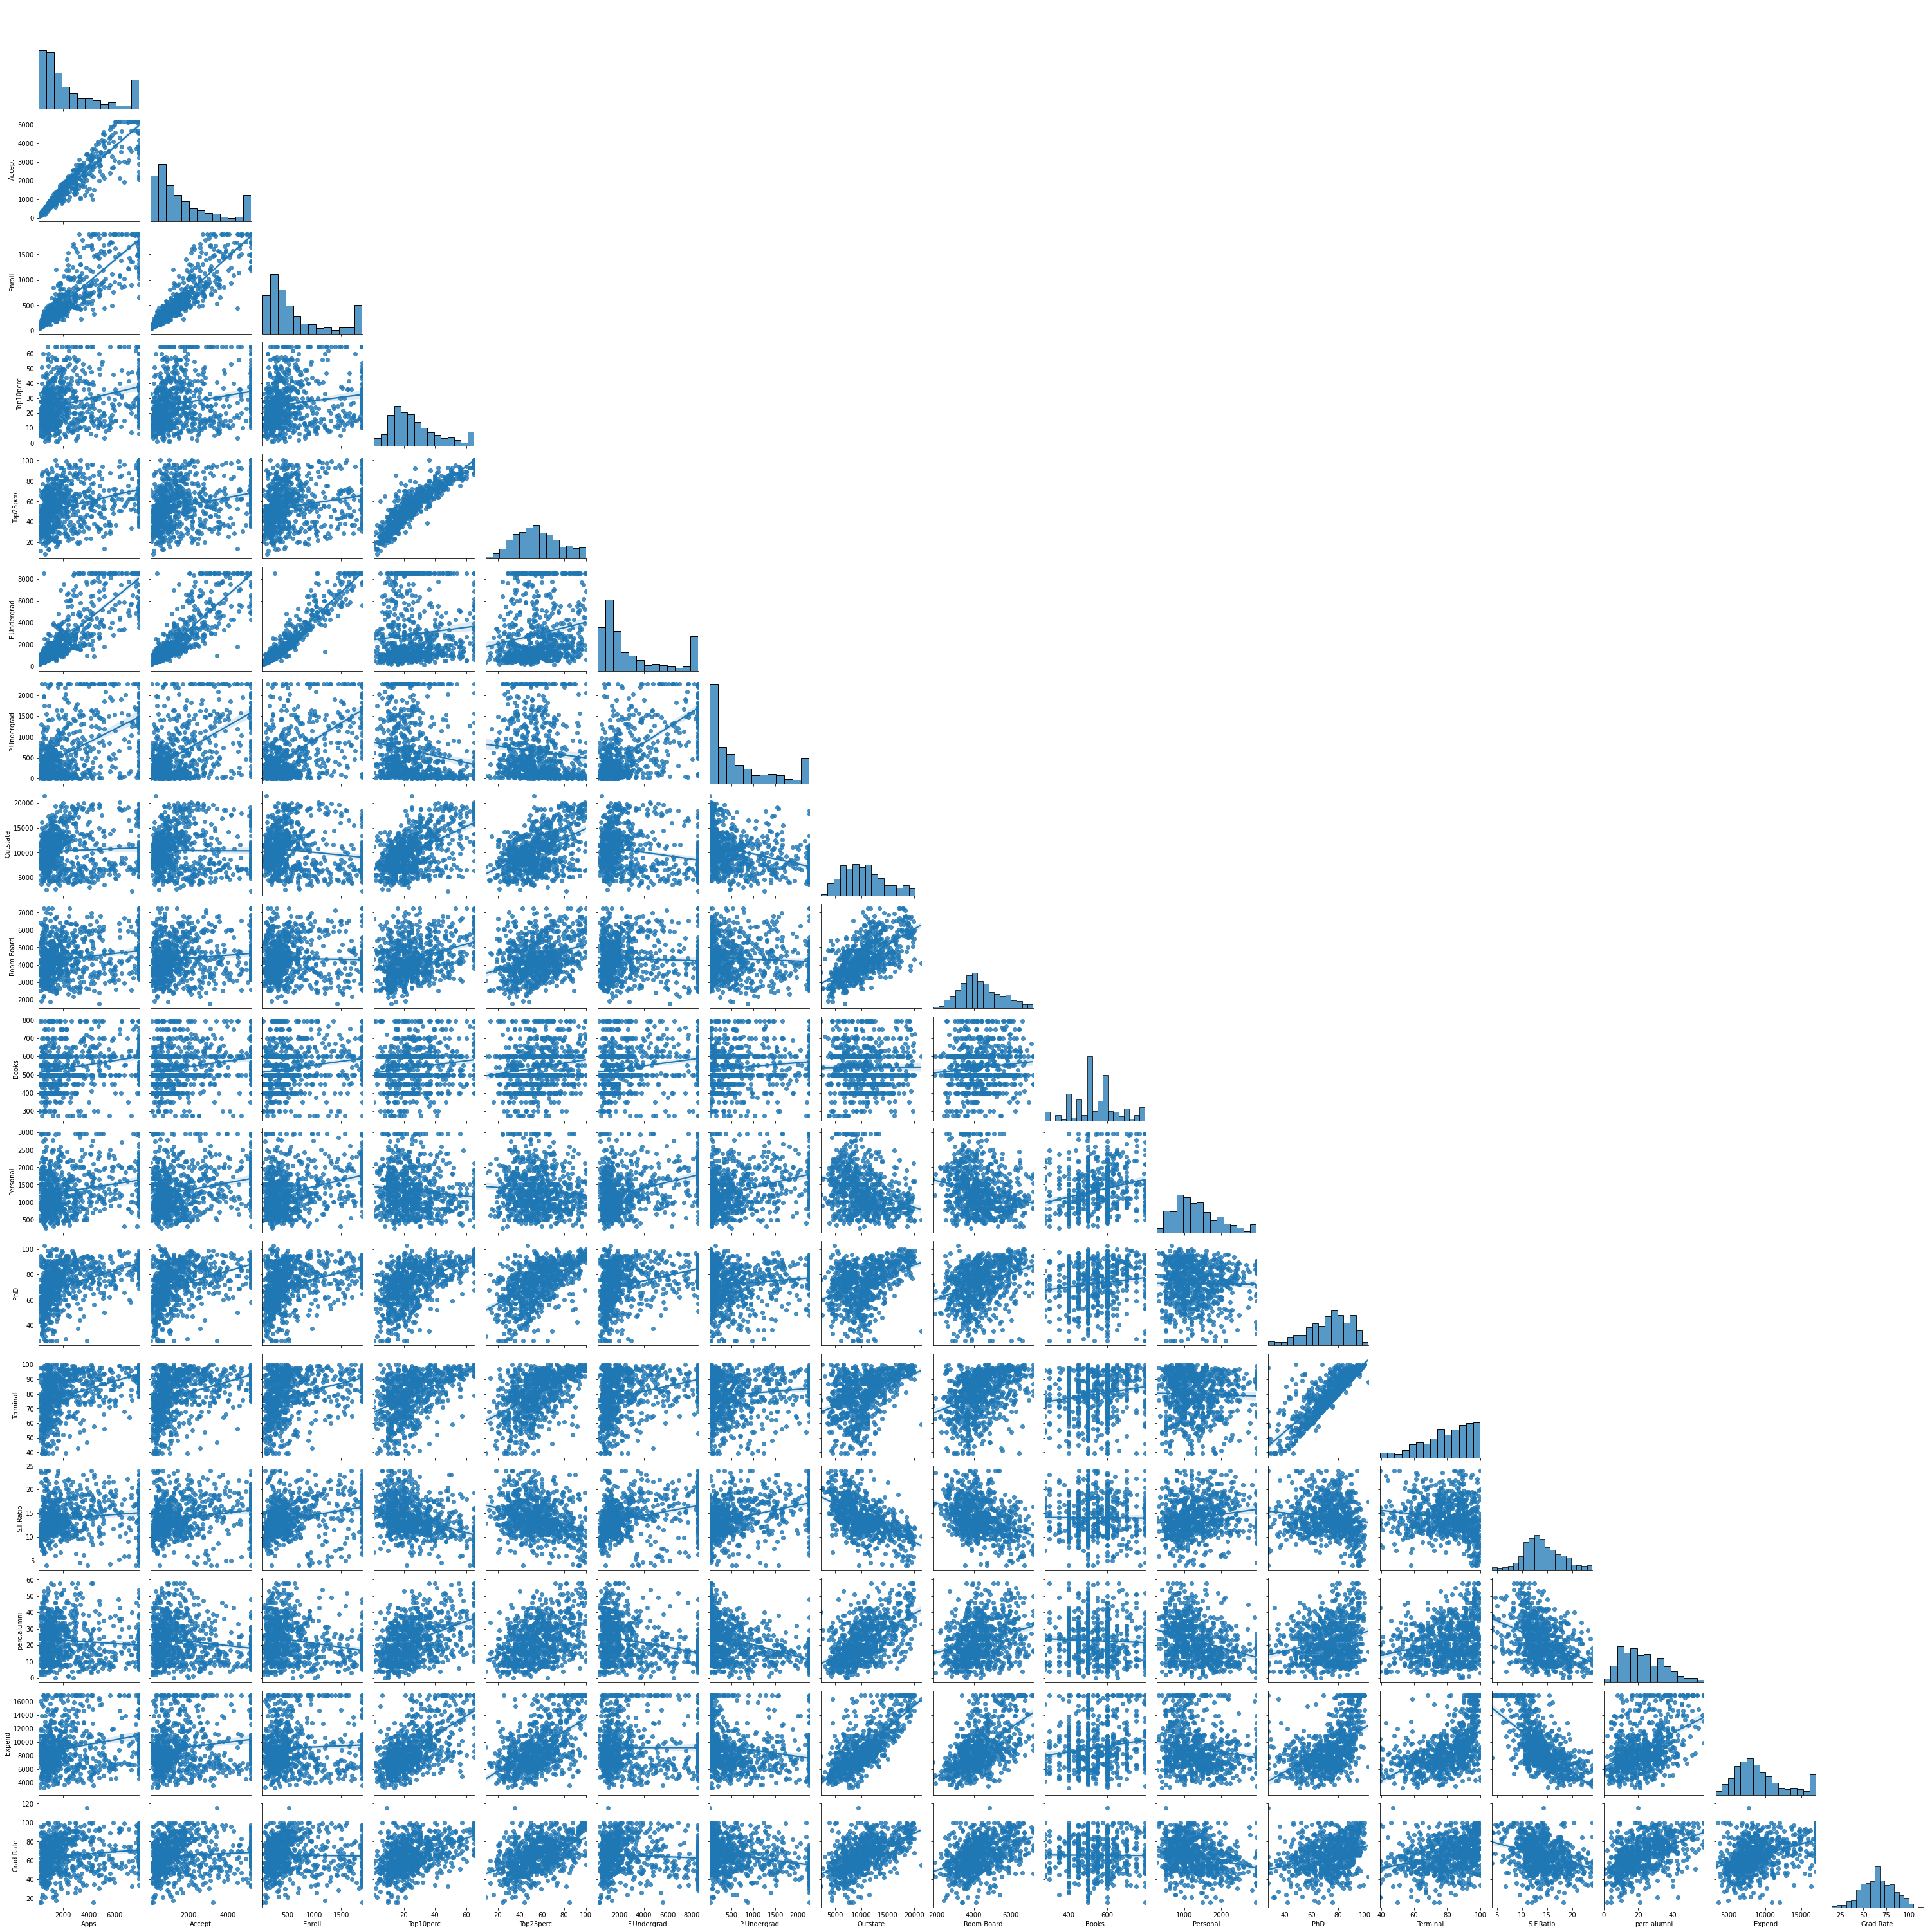

In [82]:
plt.figure(figsize=(15,15))
sns.pairplot(df2, corner=True, kind='reg');

<font color=blue>There are lot of attributes that have high correlation which can be inferred from the pairplot above, however to confirm the collinearity, let's do Pearson's correlation and Heatmap.

<font color=magenta>The above is the correlation matrix in which the value of the diagonals is 1.

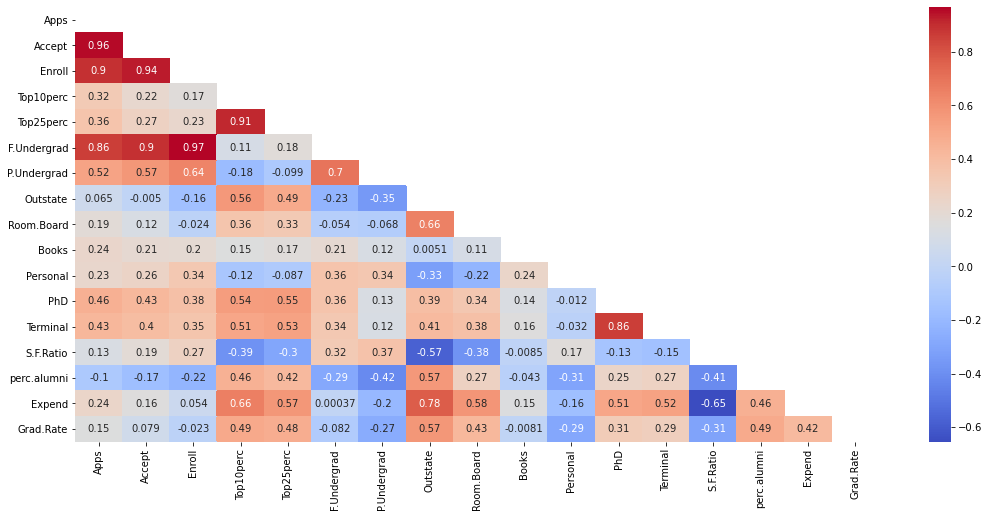

In [83]:
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, mask=mask,cmap='coolwarm');

<font color=green>The following attributes have high correlation:

<font color=darkblue>F.Undergrad & Enroll          = 0.97   
<font color=darkblue>Accept & Apps                 = 0.96   
<font color=darkblue>Accept & Enroll               = 0.94   
<font color=darkblue>Top10perc & Top25perc         = 0.91   
<font color=darkblue>F.Undergrad & Accept          = 0.90   
<font color=darkblue>F.Undergrad & Apps            = 0.86   
<font color=darkblue>Terminal & PhD.               = 0.86  
    
<font color=blue>Also its inferred that all highly correlated attributes are positively correlated.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

<font color=darkgreen>From the univariate graphs, we could see that the data is skewed for most of the attributes. Therefore let's do Scaling and Normalization of the dataset,so that all attributes are in the same measurable level.

In [84]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,2571.352638,2422.195279,81.0,776.0,1558.0,3624.0,7896.0
Accept,777.0,1746.280566,1523.286632,72.0,604.0,1110.0,2424.0,5154.0
Enroll,777.0,660.388674,570.126836,35.0,242.0,434.0,902.0,1892.0
Top10perc,777.0,26.842986,15.582539,1.0,15.0,23.0,35.0,65.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,2935.648005,2700.233049,139.0,992.0,1707.0,4005.0,8524.5
P.Undergrad,777.0,655.884170,716.274014,1.0,95.0,353.0,967.0,2275.0
Outstate,777.0,10440.196268,4021.712447,2340.0,7320.0,9990.0,12925.0,21332.5
Room.Board,777.0,4355.438224,1090.666009,1780.0,3597.0,4200.0,5050.0,7229.5
Books,777.0,539.425997,115.229712,275.0,470.0,500.0,600.0,795.0


<font color=royalblue>For Scaling the data, let's use Standard scaler as it essentially returns the z-scores of every attribute. This is a better method where the standard deviation of the data ranges between -3 to + 3 i.e. 99.73% of Normality.



In [85]:
df3 = df2.copy()

In [86]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [87]:
df3['Apps'] = std_scale.fit_transform(df3[['Apps']])
df3['Accept'] = std_scale.fit_transform(df3[['Accept']])
df3['Enroll'] = std_scale.fit_transform(df3[['Enroll']])
df3['Top10perc'] = std_scale.fit_transform(df3[['Top10perc']])
df3['Top25perc'] = std_scale.fit_transform(df3[['Top25perc']])
df3['F.Undergrad'] = std_scale.fit_transform(df3[['F.Undergrad']])
df3['P.Undergrad'] = std_scale.fit_transform(df3[['P.Undergrad']])
df3['Outstate'] = std_scale.fit_transform(df3[['Outstate']])
df3['Room.Board'] = std_scale.fit_transform(df3[['Room.Board']])
df3['Books'] = std_scale.fit_transform(df3[['Books']])
df3['Personal'] = std_scale.fit_transform(df3[['Personal']])
df3['PhD'] = std_scale.fit_transform(df3[['PhD']])
df3['Terminal'] = std_scale.fit_transform(df3[['Terminal']])
df3['S.F.Ratio'] = std_scale.fit_transform(df3[['S.F.Ratio']])
df3['perc.alumni'] = std_scale.fit_transform(df3[['perc.alumni']])
df3['Expend'] = std_scale.fit_transform(df3[['Expend']])
df3['Grad.Rate'] = std_scale.fit_transform(df3[['Grad.Rate']])

In [88]:
df3.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


In [89]:
df3.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

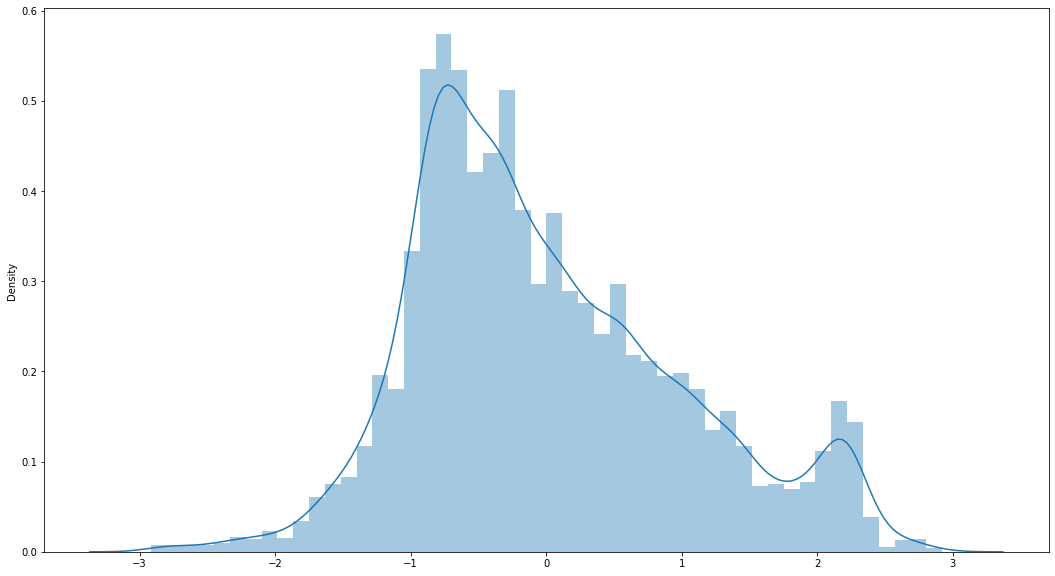

In [90]:
# once again checking the distribution of data after Scaling.

plt.figure(figsize=(18,10))
sns.distplot(df3);

<font color=royalblue>Now we can see the data distribution has transformed from a right skewed to normally distributed using Standard scaling.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.3) Comment on the comparison between covariance and the correlation matrix.

<font color=blue>Create a covariance matrix

In [91]:
cov_matrix = np.cov(df3.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [92]:
df_corr = df3.copy()
df_corr.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


<font color=royalblue>If you see the above two matrices (Covariance & Correlation respectively, they are similar. Correlation matrix is nothing but the scaled version of Covariance Matrix). “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.
    
    
<font color=blue>Checking outliers in the original dataframe:

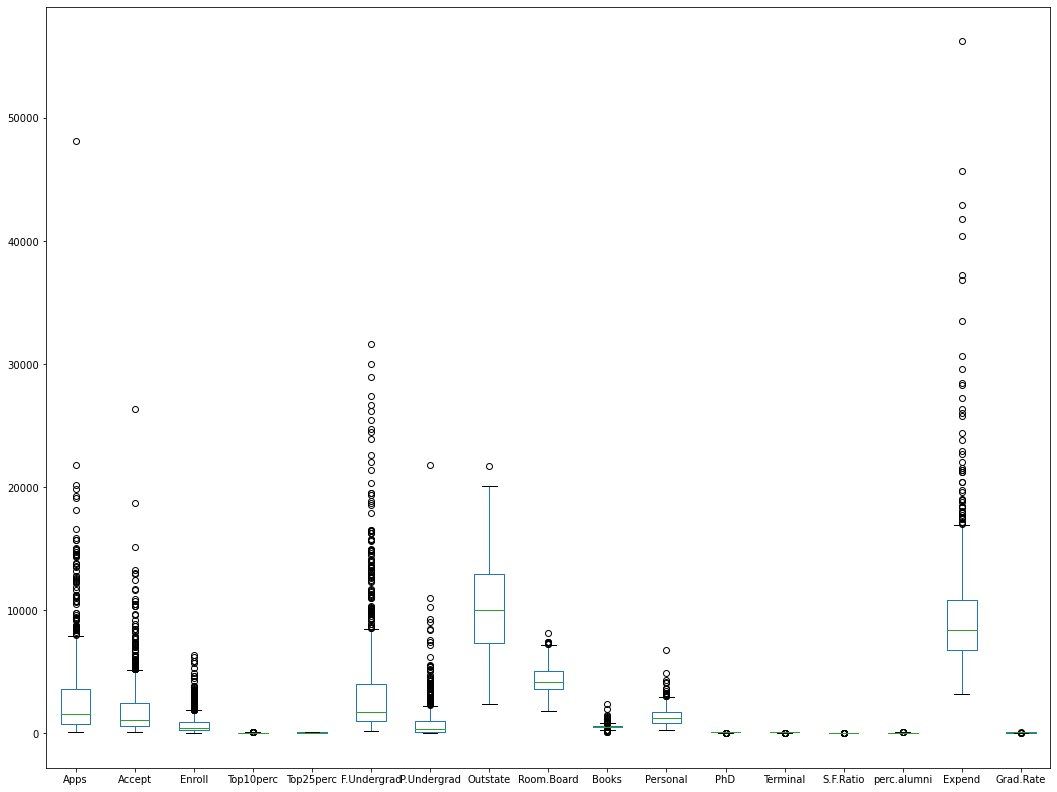

In [93]:
df.plot(kind='box', figsize=(18,14));

<font color=royalblue>Since the outliers' presence will not yield better model to analyse, we have to remove them or replace the outliers. We have used the IQR method to find the upper limit and lower limit of outlier value (Q1-1.5*IQR & Q3+1.5*IQR). Before scaling, we need to process the outliers, which we have done earlier. The following display of boxplots after processing outliers shows the absence of outliers in the new dataframe 'df2' (Before Scaling).

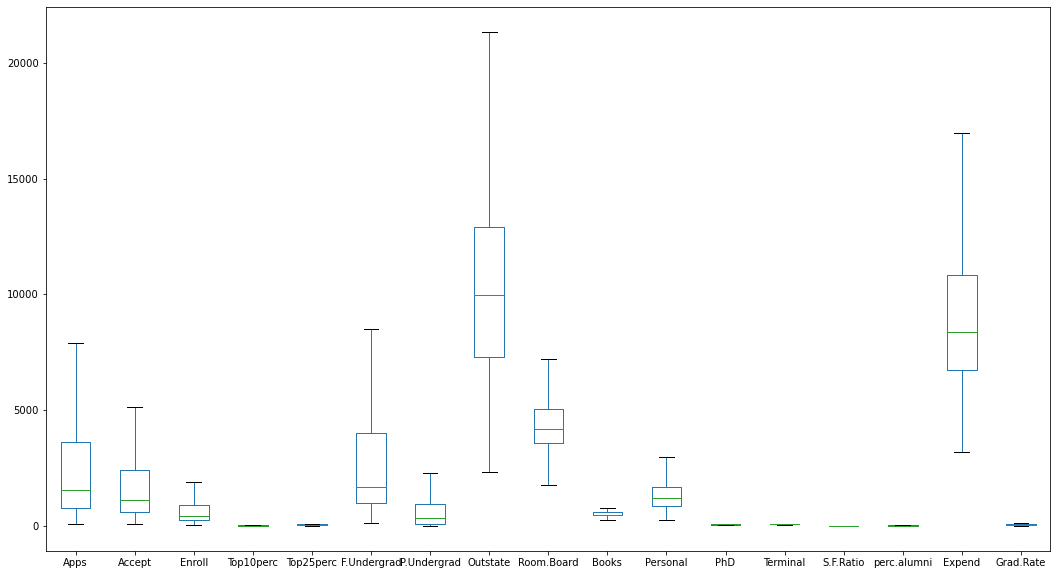

In [94]:
df2.plot(kind='box', figsize=(18,10));

<font color=royalblue>The following boxplot of Dataframe 'df3' will show the dataset after processing of outliers and Scaling using Standard Scaling method.

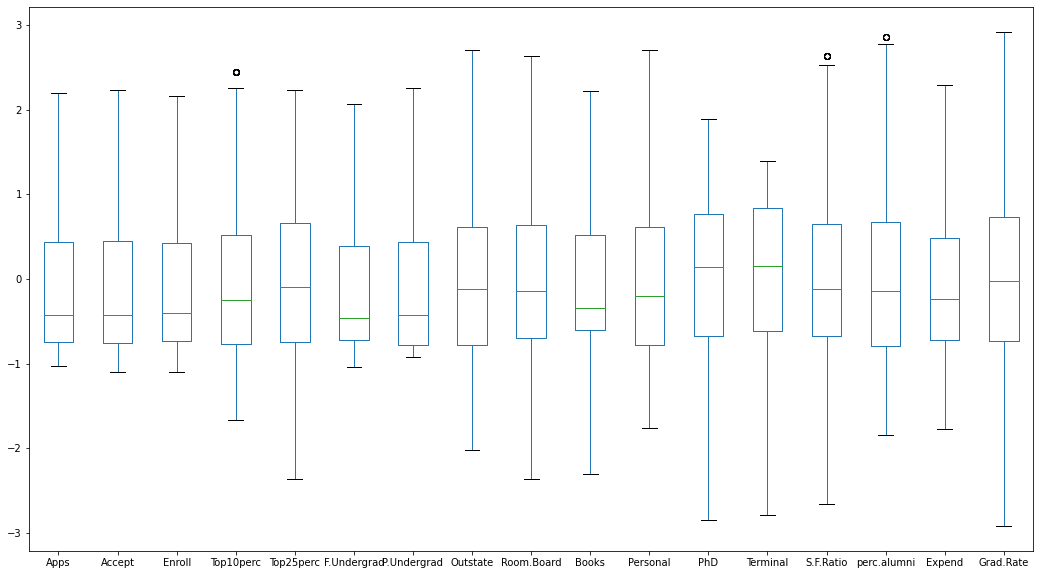

In [95]:
df3.plot(kind='box', figsize=(18,10));

<font color=royalblue>After scaling, the dataset is much more normally distributed and has absence/negligible outlier.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.5) Build the covariance matrix, eigenvalues, and eigenvector.

<font color=darkgreen>The dataset has variables or dimension >3 (17 in this case), which will be difficult to interpret the analysis. Hence we adopt Dimensionality reduction method using Principal Component Analysis (PCA). For this we need to initially build Covariance matrix then fing the eigenvalues and eigenvectors.

In [96]:
# Step 1 - Create covariance matrix for thye Scaled dataframe 'df3'

cov_matrix = np.cov(df3.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [97]:
#Identifying Eigenvalues and Eigenvectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]
Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01 -8.10177245e-02  9.87761685e-02
   2.19898081e-01 -2.18800617e-03  2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01 -1.07658626e-01  1.18140437e-01
   1.89634940e-01  1.65212882e-02  1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01 -8.55296892e-02  9.30717094e-03
   1.62314818e-01  6.80794143e-02  1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33

<font color = darkslategrey>We see there are four Eigenvalues > 1 which can be the PCAs. (Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659). These are the Principal Components in sequence you will be considering after Dimension reduction.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

<font color=royalblue>The first array from the above is the explicit form of the first PC in terms of Eigenvectors.
    
    
+0.262172Apps+0.230562Accept+0.189276Enroll+0.3388752Top10perc+0.33469053Top25perc+0.163293F.Undergrad+0.022480P.Undergrad+0.283547Outstate+0.244187Room.Board+0.096708Books-0.035230Personal+0.326411PhD+0.323116Terminal-0.163152S.F.Ratio+0.186611perc.alumni+0.328956Expend+0.238822Grad.Rate
																	

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components?        
What do the eigenvectors indicate?                                                                                                                                                                                             Perform PCA and export the data of the Principal Component scores into a data frame.


In [98]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 17 to 4)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(df3)
data_reduced.transpose()

array([[-1.60249937, -1.80467543, -1.60828258, ..., -0.57688267,
         6.57095201, -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004483,  2.1221234 , -0.50151141, ...,  0.32215836,
         1.32596419, -1.42543869],
       [-1.00842242,  3.13894266, -0.03637393, ..., -0.58725811,
         0.07770833, -1.30027359]])

In [99]:
pca.components_

array([[ 0.26217154,  0.23056246,  0.1892764 ,  0.33887452,  0.33469053,
         0.16329301,  0.02247971,  0.28354729,  0.24418659,  0.09670828,
        -0.03522996,  0.3264107 ,  0.32311598, -0.16315164,  0.18661083,
         0.32895585,  0.23882245],
       [ 0.31413626,  0.34462358,  0.38281332, -0.09931917, -0.0595055 ,
         0.39863637,  0.35755005, -0.25186362, -0.13190912,  0.09397395,
         0.23243959,  0.05513902,  0.0430332 ,  0.25980456, -0.25709255,
        -0.16000895, -0.16752366],
       [-0.08101772, -0.1076586 , -0.08552973,  0.07882881,  0.05079436,
        -0.07370777, -0.0403569 , -0.01493945,  0.02113788,  0.69712112,
         0.53097281, -0.08111341, -0.05897861, -0.27415067, -0.1037159 ,
         0.18420576, -0.24533585],
       [ 0.09877618,  0.11814041,  0.00930718, -0.36911477, -0.4168246 ,
         0.01395045,  0.22535109,  0.26297537,  0.58089415, -0.03615629,
        -0.11498297, -0.14726089, -0.08900798, -0.25948612, -0.22398246,
         0.21375611

In [100]:
#Cumulative values of Eigenvalues

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


<font color=darkgreen>The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance

<font color=royalblue>From the above array of Cumulative Eigenvalues, we see the first PC has 33.27% variation in data captured, upto 2nd PC 62.02% of cumulative variation in data captured (PC1+PC2), so on and so forth.If we need 90% of variation in data captured then we shall select 8 PCs. However, we have selected 4 PCs because the eigenvalues>1 for the first 4 PCs which we have seen in the earlier findings. 

In [101]:
data_reduced.shape

(777, 4)

<font color=darkgreen>Since we have selected first 4 PCs, the dataset is reduced its attributes to 4 from 17 for 777 records.    

The shape of the dataset after Dimensionality reduction using PCA is:
    
<font color=darkgreen>Rows = 777(records),    
<font color=darkgreen>Columns= 4(dimensions/variables).

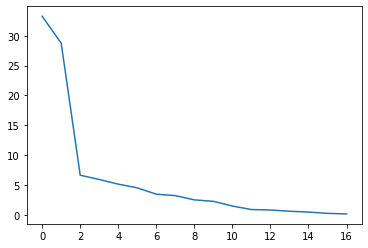

In [102]:
#The same is visualised using a Scree Plot

plt.plot(var_exp)

<font color=darkblue>Visually we can observe that there is a steep drop in variance explained with increase in number of PC's. We will proceed with 4 components here. But depending on requirement if 90% variation is preferred then 8 components have to be considered.

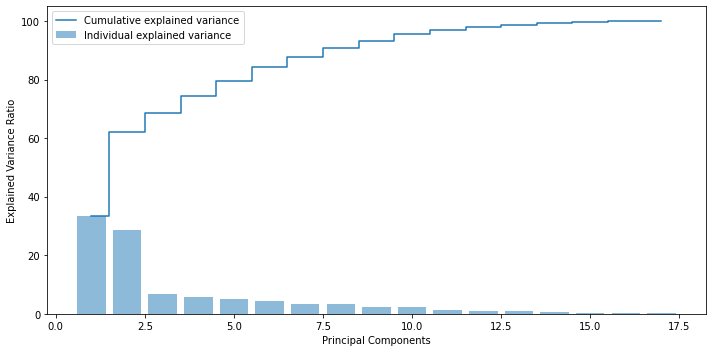

In [103]:
# Plotting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()

In [104]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144])

In [105]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.3, 62.1, 68.7, 74.6])

<font color=darkblue>The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance

<font color=darkblue>The first 4 Principal Components that has Eigenvalues>1 are considered and data reveals that 74.6% of data variation is covered in these 4 PCs.

<font color=royalblue>After performing PCA, exporting the data of the Principal Component scores into a data frame

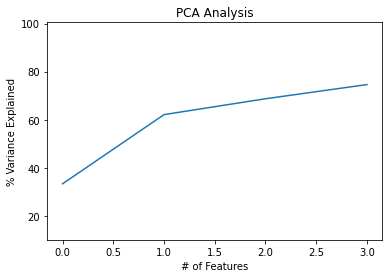

In [106]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(10,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [107]:
df_comp = pd.DataFrame(pca.components_,columns=list(df3))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416825,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192


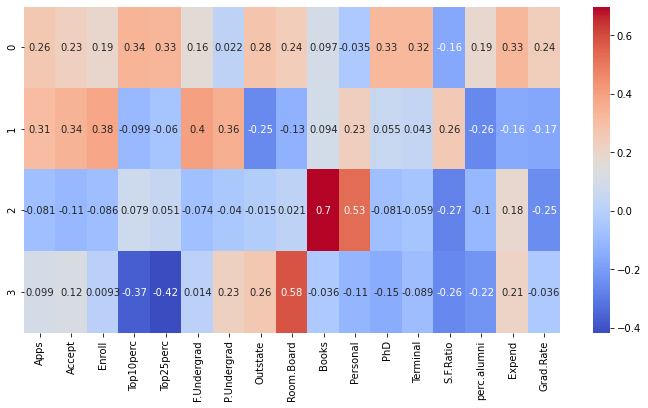

In [108]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, annot=True,cmap='coolwarm');

<font color=royalblue>We have done the PCA and exported the data of the Principal Component scores into a new data frame 'df_comp'.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">2.8) Mention the business implication of using the Principal Component Analysis for this case study.

<font color=lightslategrey>Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. With higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

Note that performing Principal Component Analysis is predominantly an intermediate step in model building therefore the information is compressed and forms Principal Components which in turn gives us the direction for further model building exercise.

This case study is based on various parameters of various institutions. The dataset had 18 attributes out which the'Names' attribute was a unique id (Categorical) which will not be helpful for the analysis hence removed. The 17 variables for 777 records needs to be reduced to remove the redundancy in features such that most of information is till not lost.

After performing PCA, the 17 attributes were compressed to 4 PCs which has a score in every of its component. The PC1 which has the highest variation in data had 33.2% information captured and first 4 PCs had 74.6% information. Note that first 2 PCs had 62.1% information captured. 

Also the multicollinearity is completely reduced and the final PC scores reveal the following:

a. The highest correlation in PC1 is Top10perc followed by Top25perc, PhD and Expend. Though the Top10perc and Top25perc had some correlation in terms of students scoring and coming from Higher secondary class.PC1 has highest correlation among other PCs in terms of higher instructional Expends per student. Therefore we can attribute quality of students to PC1 as the feature based on Ranking, Quality of faculties and instructional expends per student joining the Universities.

b. However PC2 has the highest correlation in Part-time Undergraduates joining the Universities, also the correlation is high among the Applications received Vs Accepted and Enrolled. Therefore these can be clubbed under category/group on Preference and Admissions.

Hence for further model-building, using the PCA scores will be helpful in reducing the dimensions and focus on critical attributes.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#708090;">-----------------------------------------------------------------  End of Report --------------------------------------------------------------------------                                                           